## Data Mining Assignment by Shreya Rajpal

Dataset saved to user_data.csv
=== Accuracy Report by SHREYA RAJPAL 21BBS0202 ===
Accuracy on test data: 100.00%

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


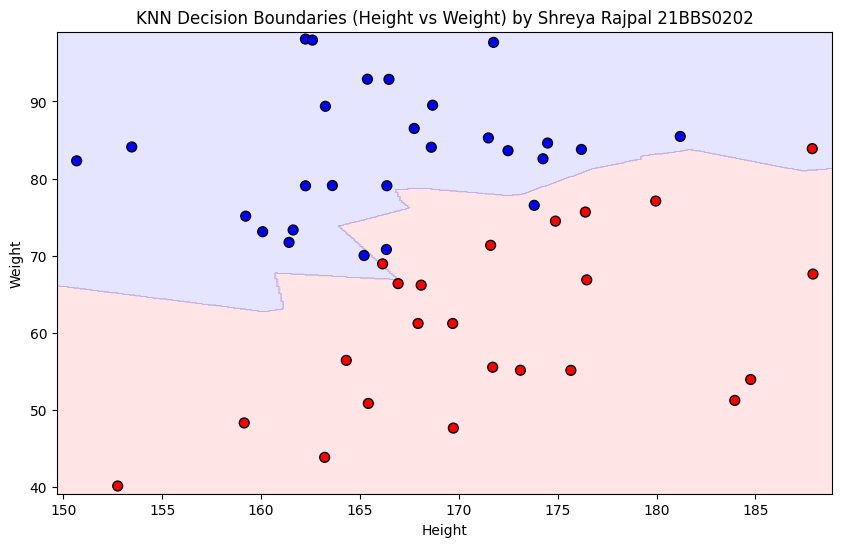

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 1: Generate a synthetic dataset with 50 user records
np.random.seed(0)

# Creating random data for 50 users
names = [f"User{i+1}" for i in range(50)]
locations = np.random.choice(['LocationA', 'LocationB', 'LocationC'], size=50)
heights = np.random.normal(170, 10, 50)  # Height in cm
weights = np.random.normal(70, 15, 50)   # Weight in kg
ages = np.random.randint(18, 60, size=50) # Age in years

# Create DataFrame
data = pd.DataFrame({
    'Name': names,
    'Location': locations,
    'Height': heights,
    'Weight': weights,
    'Age': ages
})

# Step 2: Define a binary 'Class' label based on BMI
# BMI = Weight / (Height/100)^2
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)
data['Class'] = np.where(data['BMI'] > 25, 1, 0)  # 1 for high BMI, 0 for low BMI
data = data.drop(columns=['BMI'])  # Drop BMI column after creating labels

# Step 3: Save dataset to CSV
csv_filename = "user_data.csv"
data.to_csv(csv_filename, index=False)
print(f"Dataset saved to {csv_filename}")

# Step 4: Prepare data for KNN
# We drop 'Name' and 'Location' for KNN, as they are non-numeric and categorical.
X = data[['Height', 'Weight', 'Age']]
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Implement KNN Classification
knn = KNeighborsClassifier(n_neighbors=3)  # Using 3 neighbors for the demo
knn.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output accuracy report
print("=== Accuracy Report by SHREYA RAJPAL 21BBS0202 ===")
print(f"Accuracy on test data: {accuracy * 100:.2f}%")
print("\nDetailed Classification Report:")
print(report)

# Step 7: Plotting the classification result (only on two features for simplicity)
def plot_decision_boundaries(X, y, classifier, title="KNN Decision Boundaries (Height vs Weight)", resolution=0.1):
    # Only using the first two features: Height and Weight for 2D plotting
    X_plot = X[['Height', 'Weight']]

    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X_plot['Height'].min() - 1, X_plot['Height'].max() + 1
    y_min, y_max = X_plot['Weight'].min() - 1, X_plot['Weight'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predict over the grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, X['Age'].mean())])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=(10, 6))
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])

    # Background color representing decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

    # Plot the actual data points
    plt.scatter(X_plot['Height'], X_plot['Weight'], c=y, cmap=cmap_points, edgecolor='k', s=50)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.title(title)
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries(X, y, knn, "KNN Decision Boundaries (Height vs Weight) by Shreya Rajpal 21BBS0202")


### QUESTION 2 using Categorical and Gaussian Naive Bayes 

In [13]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Step 1: Create the dataset
data = {
    'Income': ['<30', '30-70', '30-70', '30-70', '30-70', '30-70', '>70', '>70', '<30', '30-70', '30-70', '30-70'],
    'Criminal_Record': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'],
    'EXP': ['1-5', '1', '1', '1-5', '>5', '1-5', '>5', '>5', '1-5', '1-5', '1-5', '>5'],
    'Loan_Approved': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Step 2: Encode categorical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target variable
X = df[['Income', 'Criminal_Record', 'EXP']]
y = df['Loan_Approved']

# Step 3: Train Naive Bayes classifier
nb = CategoricalNB()
nb.fit(X, y)

# Step 4: Predict the probability for the new case
# New case: Income='30-70', Criminal_Record='Yes', EXP='>5'
new_case = pd.DataFrame({
    'Income': [label_encoders['Income'].transform(['30-70'])[0]],
    'Criminal_Record': [label_encoders['Criminal_Record'].transform(['Yes'])[0]],
    'EXP': [label_encoders['EXP'].transform(['>5'])[0]]
})

# Predict probability of loan approval
loan_approval_prob = nb.predict_proba(new_case)
approved_prob = loan_approval_prob[0][1]  # Probability for 'Yes' (Loan Approved)

print(f"Probability of Loan Approval for the new case by SHREYA RAJPAL 21BBS0202: {approved_prob:.2f}")


Probability of Loan Approval for the new case by SHREYA RAJPAL 21BBS0202: 0.67


=== Accuracy Report by SHREYA RAJPAL 21BBS0202 ===
Model used: Gaussian Naive Bayes
Accuracy on test data: 50.00%

Detailed Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         2
         Yes       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4


Probability of Loan Approval for the new case (Income='30-70', Criminal_Record='Yes', EXP='>5'): 0.89


C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

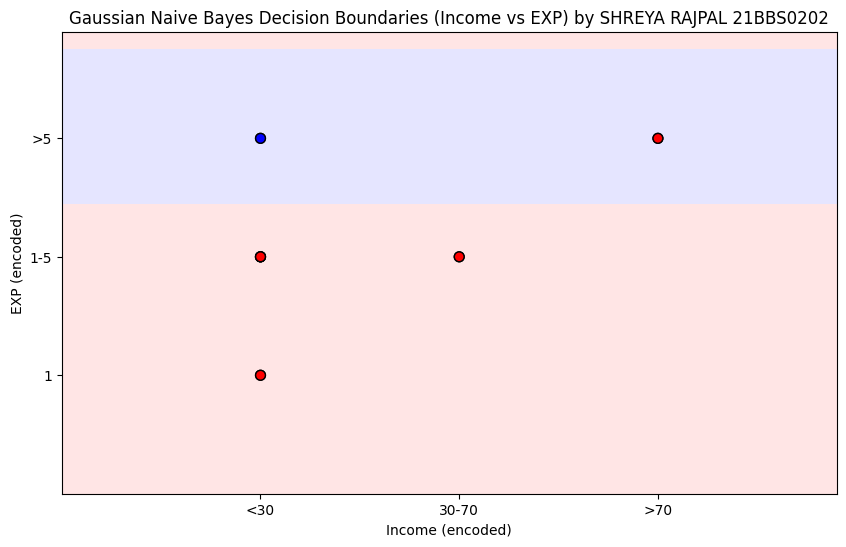

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 1: Create the dataset
data = {
    'Income': ['<30', '30-70', '30-70', '30-70', '30-70', '30-70', '>70', '>70', '<30', '30-70', '30-70', '30-70'],
    'Criminal_Record': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'],
    'EXP': ['1-5', '1', '1', '1-5', '>5', '1-5', '>5', '>5', '1-5', '1-5', '1-5', '>5'],
    'Loan_Approved': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Step 2: Encode categorical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target variable
X = df[['Income', 'Criminal_Record', 'EXP']]
y = df['Loan_Approved']

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])

# Output accuracy report
print("=== Accuracy Report by SHREYA RAJPAL 21BBS0202 ===")
print(f"Model used: Gaussian Naive Bayes")
print(f"Accuracy on test data: {accuracy * 100:.2f}%")
print("\nDetailed Classification Report:")
print(report)

# Step 6: Predict the probability for the new case
# New case: Income='30-70', Criminal_Record='Yes', EXP='>5'
new_case = pd.DataFrame({
    'Income': [label_encoders['Income'].transform(['30-70'])[0]],
    'Criminal_Record': [label_encoders['Criminal_Record'].transform(['Yes'])[0]],
    'EXP': [label_encoders['EXP'].transform(['>5'])[0]]
})

# Predict probability of loan approval for the new case
loan_approval_prob = nb.predict_proba(new_case)
approved_prob = loan_approval_prob[0][1]  # Probability for 'Yes' (Loan Approved)

print(f"\nProbability of Loan Approval for the new case (Income='30-70', Criminal_Record='Yes', EXP='>5'): {approved_prob:.2f}")

# Step 7: Plot decision boundaries for Income and EXP
# Map the categorical values to integers for plotting
income_mapping = {'<30': 0, '30-70': 1, '>70': 2}
exp_mapping = {'1': 0, '1-5': 1, '>5': 2}
X_plot = X[['Income', 'EXP']].replace({'Income': income_mapping, 'EXP': exp_mapping})

# Create mesh grid for decision boundary
x_min, x_max = X_plot['Income'].min() - 1, X_plot['Income'].max() + 1
y_min, y_max = X_plot['EXP'].min() - 1, X_plot['EXP'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict over the grid (we set 'Criminal_Record' to 0 for simplicity)
Z = nb.predict(np.c_[xx.ravel(), np.zeros_like(xx.ravel()), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Scatter plot of the actual data points
plt.scatter(X_plot['Income'], X_plot['EXP'], c=y, cmap=cmap_points, edgecolor='k', s=50)
plt.xlabel('Income (encoded)')
plt.ylabel('EXP (encoded)')
plt.title("Gaussian Naive Bayes Decision Boundaries (Income vs EXP) by SHREYA RAJPAL 21BBS0202")
plt.xticks(ticks=[0, 1, 2], labels=['<30', '30-70', '>70'])
plt.yticks(ticks=[0, 1, 2], labels=['1', '1-5', '>5'])
plt.show()
